### Impoting the packages we need

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import linear_model

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

### Reading the train dataset and showing the first five rows

In [2]:
data = pd.read_csv('train_revised.csv')
data.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


### Exploaring the types of the columns

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
ride_id            51645 non-null int64
seat_number        51645 non-null object
payment_method     51645 non-null object
payment_receipt    51645 non-null object
travel_date        51645 non-null object
travel_time        51645 non-null object
travel_from        51645 non-null object
travel_to          51645 non-null object
car_type           51645 non-null object
max_capacity       51645 non-null int64
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


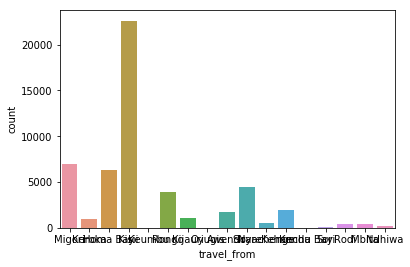

In [3]:
data.loc[:,'travel_from'].value_counts()
sns.countplot(x="travel_from", data=data)
plt.show()


## Feature engineering 

In [5]:
# Droping unnecessary columns from the data like payment_method, payment_receipt, seat_number and travel_to.
Data = data[['ride_id','travel_date','travel_time','travel_from','car_type','max_capacity']]
Data.sort_values(by='ride_id').head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity
0,1442,17-10-17,7:15,Migori,Bus,49
1,5437,19-11-17,7:12,Migori,Bus,49
2,5710,26-11-17,7:05,Keroka,Bus,49
62,5777,27-11-17,7:10,Homa Bay,Bus,49
6,5777,27-11-17,7:10,Homa Bay,Bus,49


### Counting the number of ticket using the ride_id 

In [6]:
dic={}
for i in Data['ride_id']:
    if i in dic.keys():
        dic[i]+=1
    else:
        dic[i]=1
## Creating a data frame of number of ticket per ride_id

n= pd.DataFrame.from_dict(data=dic, orient="index").reset_index()
n.rename(columns={'index': 'ride_id', 0: 'number_of_ticket'}, inplace=True)

In [24]:
Data1 = Data.merge(n, on="ride_id")

Data1.rename(columns={'number_of_ticket_y':'number_of_ticket'},inplace=True)
#Data1.drop('number_of_ticket',axis=1,inplace=True)

### Drop the duplication of the data

In [25]:
Data1.drop_duplicates(inplace=True)

### Droping the ride_id, because we used it just to count the number_of_ticket and no need any more 

In [26]:
Data1.drop(['ride_id'],axis=1,inplace=True)
Data1.head()

,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket
0,17-10-17,7:15,Migori,Bus,49,1
1,19-11-17,7:12,Migori,Bus,49,1
2,26-11-17,7:05,Keroka,Bus,49,1
3,27-11-17,7:10,Homa Bay,Bus,49,5
8,27-11-17,7:12,Migori,Bus,49,31


In [27]:
Data1.shape

(6249, 6)

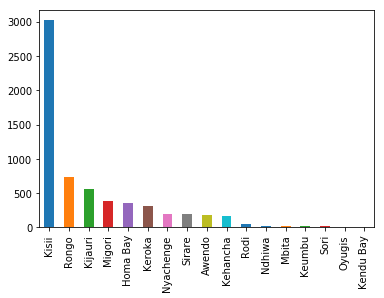

In [28]:
Data1['travel_from'].sort_values().value_counts().plot.bar()
plt.show()

In [29]:
#Data1.shape[0]

In [30]:
#Data1["travel_date"] = pd.to_datetime(Data1["travel_date"],infer_datetime_format=True)
#for i in range(0,Data1.shape[0]):
#    if int(Data1["travel_date"].str.split('-')[i][2])==17:
#        Data1["travel_date"][i]=Data1["travel_date"][i].dt.dayofweek+1
#    else:
#        Data1["travel_date"][i]=Data1["travel_date"][i].dt.dayofyear+1

In [31]:
Data1["travel_date"] = pd.to_datetime(Data1["travel_date"],infer_datetime_format=True)
Data1["year"] = Data1["travel_date"].dt.year-2017 #change the travel_date to year,0=2017   1=2018
Data1["month"] = Data1["travel_date"].dt.month # the month
Data1["day_of_year"] = Data1["travel_date"].dt.dayofyear # day_of_year
Data1["day_of_week"] = Data1["travel_date"].dt.dayofweek #day_of_week
#chaning the data 
#Data1["travel_date"] = Data1["travel_date"].str.split('-').apply(lambda x: int(x[0]) + int(x[1])+int(x[2]))

### Changing the date to be numerical 

In [32]:
# remove the 3 unlisted towns
A=Data1[Data1.travel_from !='Kendu Bay']
B=A[A.travel_from !='Oyugis']
C=B[B.travel_from !='Keumbu']
C.shape

(6226, 10)

In [33]:
Data1=C
Data1.shape

(6226, 10)

### Changing travel_time to be numerical and changing travel_from and car_type to be categorical

In [37]:

#converting the travel_time to be numeric
Data1["mint"] = Data1["travel_time"].str.split(':').apply(lambda x: int(x[0])*60+int(x[1]))
Data1["hour"] = Data1["travel_time"].str.split(':').apply(lambda x: int(x[0]))


/usr/lib/python3/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/lib/python3/dist-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [38]:
Data1["car_type"] = pd.Categorical(Data1["car_type"])
car_type_categories = Data1.car_type.cat.categories
Data1["car_type"] = Data1.car_type.cat.codes+1

/usr/lib/python3/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/lib/python3/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [39]:
Data1["travel_from"] = pd.Categorical(Data1["travel_from"])
travel_from_categories = Data1.travel_from.cat.categories
Data1["travel_from"] = Data1.travel_from.cat.codes+1
Data1.head(3)

/usr/lib/python3/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/lib/python3/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,year,month,day_of_year,day_of_week,mint,hour
0,2017-10-17,7:15,8,1,49,1,0,10,290,1,435,7
1,2017-11-19,7:12,8,1,49,1,0,11,323,6,432,7
2,2017-11-26,7:05,4,1,49,1,0,11,330,6,425,7


### Loading the test data

In [40]:
#loading test data
test_data = pd.read_csv('test_questions.csv')
test_data.drop(['travel_to'],axis=1,inplace=True)
        

test_data.head(2)


,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity
0,247,2018-05-07,07:06,Kisii,Bus,49
1,256,2018-05-06,11:08,Kisii,shuttle,11


### converting the travel_time to be numeric

In [41]:
test_data["mint"] = test_data["travel_time"].str.split(':').apply(lambda x: int(x[1])*60+int(x[1]))
test_data["hour"] = test_data["travel_time"].str.split(':').apply(lambda x: int(x[0]))
test_data.head(2)

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,mint,hour
0,247,2018-05-07,07:06,Kisii,Bus,49,366,7
1,256,2018-05-06,11:08,Kisii,shuttle,11,488,11


In [42]:
test_data["travel_date"] = pd.to_datetime(test_data["travel_date"],infer_datetime_format=True)
test_data["year"] = test_data["travel_date"].dt.year-2017 
test_data["month"] = test_data["travel_date"].dt.month
test_data["day_of_year"] = test_data["travel_date"].dt.dayofyear
test_data["day_of_week"] = test_data["travel_date"].dt.dayofweek

In [43]:
#test_data["travel_date"] =test_data["travel_date"].str.split('-').apply(lambda x: int(x[2]+ x[1] +x[0]))

test_data["car_type"] = pd.Categorical(test_data["car_type"])
car_type_categories = test_data.car_type.cat.categories
test_data["car_type"] =test_data.car_type.cat.codes+1



test_data["travel_from"] = pd.Categorical(test_data["travel_from"])
travel_from_categories = test_data.travel_from.cat.categories
test_data["travel_from"] = test_data.travel_from.cat.codes+1


test_data.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,mint,hour,year,month,day_of_year,day_of_week
0,247,2018-05-07,07:06,6,1,49,366,7,1,5,127,0
1,256,2018-05-06,11:08,6,2,11,488,11,1,5,126,6
2,275,2018-05-04,05:00,6,2,11,0,5,1,5,124,4
3,285,2018-05-04,09:10,6,2,11,610,9,1,5,124,4
4,286,2018-05-04,09:20,6,2,11,1220,9,1,5,124,4


In [44]:
Data2 = Data1[['number_of_ticket','travel_from','car_type','hour','mint','year','month','day_of_week']]
Data2.head()

,number_of_ticket,travel_from,car_type,hour,mint,year,month,day_of_week
0,1,8,1,7,435,0,10,1
1,1,8,1,7,432,0,11,6
2,1,4,1,7,425,0,11,6
3,5,2,1,7,430,0,11,0
8,31,8,1,7,432,0,11,0


### Creating the train data, we used the number_of_ticket as y_train and the rest of the columns as x_train

In [46]:
x_train = Data2.drop(['number_of_ticket'], axis=1)
#scalling the data
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
y_train = Data2['number_of_ticket']
x_train[:5]

array([[ 0.46976138, -0.97776088, -0.32459358, -0.33803829, -1.68759013,
         1.03976993, -0.97658097],
       [ 0.46976138, -0.97776088, -0.32459358, -0.35496921, -1.68759013,
         1.2850195 ,  1.57704907],
       [-0.87897477, -0.97776088, -0.32459358, -0.3944747 , -1.68759013,
         1.2850195 ,  1.57704907],
       [-1.55334284, -0.97776088, -0.32459358, -0.36625649, -1.68759013,
         1.2850195 , -1.48730698],
       [ 0.46976138, -0.97776088, -0.32459358, -0.35496921, -1.68759013,
         1.2850195 , -1.48730698]])

In [47]:
test_data1=test_data[['ride_id','travel_from','car_type','hour','mint','year','month','day_of_week']]
test_data1.head()

,ride_id,travel_from,car_type,hour,mint,year,month,day_of_week
0,247,6,1,7,366,1,5,0
1,256,6,2,11,488,1,5,6
2,275,6,2,5,0,1,5,4
3,285,6,2,9,610,1,5,4
4,286,6,2,9,1220,1,5,4


### we creating the x_test from test_data by droping the ride_id

In [49]:
x_test=test_data1.drop(['ride_id'],axis=1)
#scalling the test data
x_test=scalar.fit_transform(x_test)

### Spliting the train data to two groups to training and test
### in order to test the accurcy of our model

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(x_train,y_train, test_size=.1,random_state=143)

In [51]:
X_train.shape, X_test.shape

((5603, 7), (623, 7))

In [52]:
Y_train.head()

14560     9
7733      5
14455    14
20279     1
4461      1
Name: number_of_ticket, dtype: int64

In [53]:
Y_test.head()

32212     1
43768    11
9040     11
16485     3
17830     4
Name: number_of_ticket, dtype: int64

### Training the model 

### Bagging

In [54]:

model1=BaggingRegressor(n_estimators=100,n_jobs=-1,random_state=143)


In [55]:
model1.fit(x_train,y_train)

BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=100, n_jobs=-1, oob_score=False, random_state=143,
         verbose=0, warm_start=False)

In [57]:
predictions1=model1.predict(x_test)

In [58]:
d1 = {'ride_id':test_data["ride_id"], 'number_of_ticket': predictions1}
df_predictions1 = pd.DataFrame(data=d1)
df_predictions1 = df_predictions1[['ride_id','number_of_ticket']]
df_predictions1['number_of_ticket']=df_predictions1['number_of_ticket'].apply(lambda x: x)

# Showing the top result of the number_of_ticket
df_predictions1.head(10)


,ride_id,number_of_ticket
0,247,6.510000
1,256,3.400000
2,275,3.460000
3,285,6.546667
4,286,9.572952
5,287,2.940000
6,288,7.740167
7,292,1.730000
8,298,3.540000
9,302,3.471667


In [59]:
df_predictions1.number_of_ticket.max()

35.73854761904762

In [60]:
predictions1=model1.predict(X_test)
print (mean_absolute_error(predictions1,Y_test))

1.8421686910378725


In [61]:
model1.score(x_train,y_train)

0.8448835880473634

### Random forset

### Random Forest Regressor

In [62]:
model = RandomForestRegressor(n_jobs=-1,n_estimators=100,random_state=143)

In [63]:
model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=False, random_state=143,
           verbose=0, warm_start=False)

### Predicting the number_of_ticket from the given test data

In [64]:
predictions=model.predict(x_test)

### Creating data frame that contains the number_of_ticket and the ride_id

In [65]:
d = {'ride_id':test_data["ride_id"], 'number_of_ticket': predictions}
df_predictions = pd.DataFrame(data=d)
df_predictions = df_predictions[['ride_id','number_of_ticket']]
df_predictions['number_of_ticket']=df_predictions['number_of_ticket'].apply(lambda x: x)
df_predictions.head(10)


,ride_id,number_of_ticket
0,247,6.020000
1,256,3.540000
2,275,3.640000
3,285,6.545000
4,286,9.574286
5,287,3.090000
6,288,7.670833
7,292,1.750000
8,298,3.410000
9,302,3.675000


In [66]:
predictions=model.predict(X_test)
print (mean_absolute_error(predictions,Y_test))

1.8410921795343944


In [67]:
model.score(x_train,y_train)

0.8448552054974192

### DecisionTreeRegressor


In [68]:
Dtr = DecisionTreeRegressor()

In [69]:
Dtr.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [70]:
pred_dtr=Dtr.predict(x_test)

In [71]:
d_dtr = {'ride_id':test_data["ride_id"], 'number_of_ticket': pred_dtr}
df_predictions3 = pd.DataFrame(data=d_dtr)
df_predictions3 = df_predictions3[['ride_id','number_of_ticket']]
df_predictions3['number_of_ticket']=df_predictions3['number_of_ticket'].apply(lambda x: x)

df_predictions3.head(10)

,ride_id,number_of_ticket
0,247,7.0
1,256,1.0
2,275,1.0
3,285,1.0
4,286,10.0
5,287,1.0
6,288,11.0
7,292,1.0
8,298,1.0
9,302,3.0


In [72]:
predictions3=Dtr.predict(X_test)
print (mean_absolute_error(predictions3,Y_test))

1.1668004280363833


In [73]:
Dtr.score(x_train,y_train)

0.8795812577580809

###  GradientBoostingRegressor

In [74]:
Gbr=GradientBoostingRegressor(n_estimators=100)

In [75]:
Gbr.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [76]:
pred_gbr=Gbr.predict(x_test)

In [77]:
d_gbr = {'ride_id':test_data["ride_id"], 'number_of_ticket': pred_gbr}
df_predictions5 = pd.DataFrame(data=d_gbr)
df_predictions5 = df_predictions5[['ride_id','number_of_ticket']]
df_predictions5['number_of_ticket']=df_predictions5['number_of_ticket'].apply(lambda x: x)

df_predictions5.head(10)

,ride_id,number_of_ticket
0,247,7.064552
1,256,7.042597
2,275,4.317046
3,285,7.313288
4,286,8.619825
5,287,6.936093
6,288,8.580442
7,292,6.936093
8,298,5.081708
9,302,8.207251


In [78]:
predictions5=Gbr.predict(X_test)
print (mean_absolute_error(predictions5,Y_test))

3.820717212280012


In [79]:
Gbr.score(x_train,y_train)

0.5618345278889036

In [80]:
#the average between the methods
df_predictions_final=(df_predictions+df_predictions1+df_predictions3+df_predictions5)/4

In [81]:
df_predictions_final.head()

,ride_id,number_of_ticket
0,247,6.648638
1,256,3.745649
2,275,3.104261
3,285,5.351239
4,286,9.441766


In [82]:
df_predictions_final['number_of_ticket']=df_predictions_final['number_of_ticket'].apply(lambda x: int(np.floor(x)))

In [83]:
df_predictions_final.head()

,ride_id,number_of_ticket
0,247,6
1,256,3
2,275,3
3,285,5
4,286,9


In [84]:
df_predictions_final.to_csv('Nour12.csv',index=False)

In [85]:
df_predictions_final.max()

ride_id             15344
number_of_ticket       31
dtype: int64